[![img](..\ep8_2018-57x57.png)](http://endlesspint.com/)

# Spence/Garcia, What Were the Odds of That?

**post @** [endlesspint.com](http://endlesspint.com/2019-03-18-spence-garcia-what-were-the-odds/)

In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline  

from scipy.stats import binom, poisson, zscore

## Coming into the Fight

![img](img/spence-garcia-compubox-punch-stats.jpg)

**source:** https://www.boxingscene.com/errol-spence-vs-mikey-garcia-compubox-historical-review--137148

## (mis)Using Poisson to Get an Idea of Expected Fighter Output

Spence could be expected to be busier, but by how much and where?

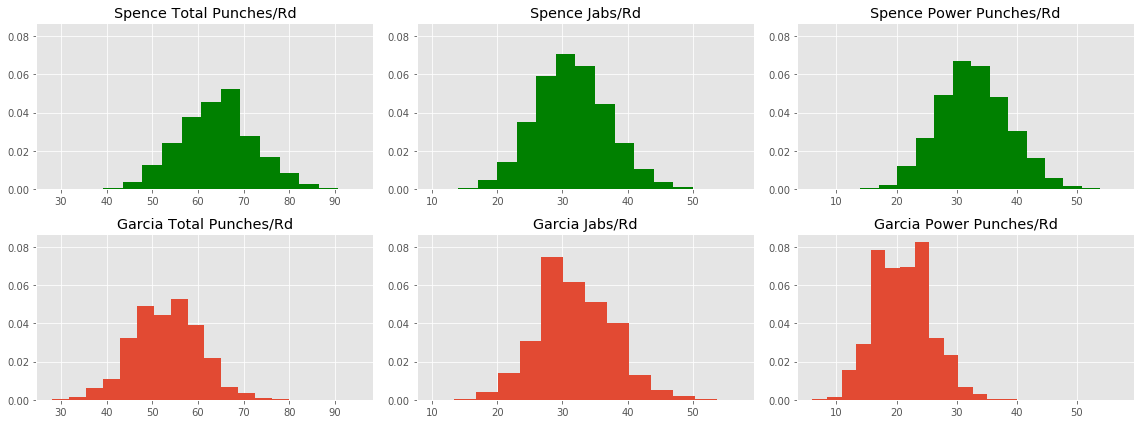

In [2]:
np.random.seed(8)

sim_cnt_poi = 10000

spence_tot_poi, spence_jab_poi, spence_pow_poi = np.random.poisson(64, sim_cnt_poi), \
                                                    np.random.poisson(31, sim_cnt_poi), \
                                                    np.random.poisson(33, sim_cnt_poi)
garcia_tot_poi, garcia_jab_poi, garcia_pow_poi = np.random.poisson(53, sim_cnt_poi), \
                                                    np.random.poisson(32, sim_cnt_poi), \
                                                    np.random.poisson(21, sim_cnt_poi)


plt.figure(figsize=(16,6))

    # SPENCE
    
ax1 = plt.subplot(231)
plt.hist(spence_tot_poi, 14, density=True, color='green')
plt.title("Spence Total Punches/Rd")

ax2 = plt.subplot(232, sharey=ax1)
plt.hist(spence_jab_poi, 14, density=True, color='green')
plt.title("Spence Jabs/Rd")

ax3 = plt.subplot(233, sharey=ax1)
plt.hist(spence_pow_poi, 14, density=True, color='green')
plt.title("Spence Power Punches/Rd")


    # GARCIA
    
plt.subplot(234, sharex=ax1, sharey=ax1)
plt.hist(garcia_tot_poi, 14, density=True)
plt.title("Garcia Total Punches/Rd")

plt.subplot(235, sharex=ax2, sharey=ax1)
plt.hist(garcia_jab_poi, 14, density=True)
plt.title("Garcia Jabs/Rd")

plt.subplot(236, sharex=ax3, sharey=ax1)
plt.hist(garcia_pow_poi, 14, density=True)
plt.title("Garcia Power Punches/Rd")


plt.tight_layout()

## Fight Night

![img](img/spence-garcia-compubox-punch-stats_1.jpg)

**source:** https://www.boxingscene.com/errol-spence-vs-mikey-garcia-compubox-punch-stats--137161

## A look at actual thrown performance v expectations

In [3]:
spence_total_thrown = [46, 55, 75, 89, 86, 95, 70, 102, 121, 125, 118, 100]
spence_jabs_thrown = [39, 43, 53, 61, 62, 56, 50, 60, 56, 58, 45, 35]
spence_power_thrown = [7, 12, 22, 28, 24, 39, 20, 42, 65, 67, 73, 65]

garcia_total_thrown = [12, 28, 31, 35, 41, 43, 26, 41, 32, 62, 15, 40]
garcia_jabs_thrown = [9, 13, 18, 20, 17, 19, 10, 22, 17, 25, 2, 16]
garcia_power_thrown = [3, 15, 13, 15, 24, 24, 16, 19, 15, 37, 13, 24]

## A tale of two jabs: Spence pumped out that lead left at a ridiculous rate, neutralizing Garcia while setting-up the rest of his own offense

In [4]:
def chance_of_throwing_GE(sim, act):
    return [np.sum(sim >= x)/len(sim) for x in  act]

spence_comp_thrown = [(spence_tot_poi, spence_total_thrown), (spence_jab_poi, spence_jabs_thrown), (spence_pow_poi, spence_power_thrown)]

garcia_comp_thrown = [(garcia_tot_poi, garcia_total_thrown), (garcia_jab_poi, garcia_jabs_thrown), (garcia_pow_poi, garcia_power_thrown)]


print("SPENCE")
for spence in spence_comp_thrown:
    spence_perf = chance_of_throwing_GE(spence[0], spence[1])
    print(spence_perf, np.mean(spence_perf))
    
print("\nGARCIA")
for garcia in garcia_comp_thrown:
    garcia_perf = chance_of_throwing_GE(garcia[0], garcia[1])
    print(garcia_perf, np.mean(garcia_perf))

SPENCE
[0.9912, 0.882, 0.0963, 0.0015, 0.005, 0.0001, 0.2386, 0.0, 0.0, 0.0, 0.0, 0.0] 0.18455833333333335
[0.093, 0.0245, 0.0001, 0.0, 0.0, 0.0, 0.0009, 0.0, 0.0, 0.0, 0.011, 0.2537] 0.031933333333333334
[1.0, 1.0, 0.9827, 0.8285, 0.9537, 0.1682, 0.9959, 0.0747, 0.0, 0.0, 0.0, 0.0] 0.5003083333333334

GARCIA
[1.0, 1.0, 0.9997, 0.9969, 0.9615, 0.9309, 1.0, 0.9615, 0.9992, 0.1232, 1.0, 0.9713] 0.9120166666666667
[1.0, 0.9999, 0.9971, 0.9905, 0.9981, 0.995, 1.0, 0.9725, 0.9981, 0.9089, 1.0, 0.9991] 0.9882666666666666
[1.0, 0.927, 0.978, 0.927, 0.283, 0.283, 0.8865, 0.6958, 0.927, 0.0008, 0.978, 0.283] 0.6807583333333332


## What about contact? "Everyone's gotta plan until they get hit."

95 percent range for Garcia total: 	 103  -  138
	 Garcia total actually landed: 	 75
	 prob of landing this Garcia total count or less: 0%
95 percent range for Garcia jabs: 	 29  -  49
	 Garcia jabs actually landed: 	 21
	 prob of landing this Garcia jabs count or less: 0%
95 percent range for Garcia power: 	 80  -  107
	 Garcia power actually landed: 	 54
	 prob of landing this Garcia power count or less: 0%


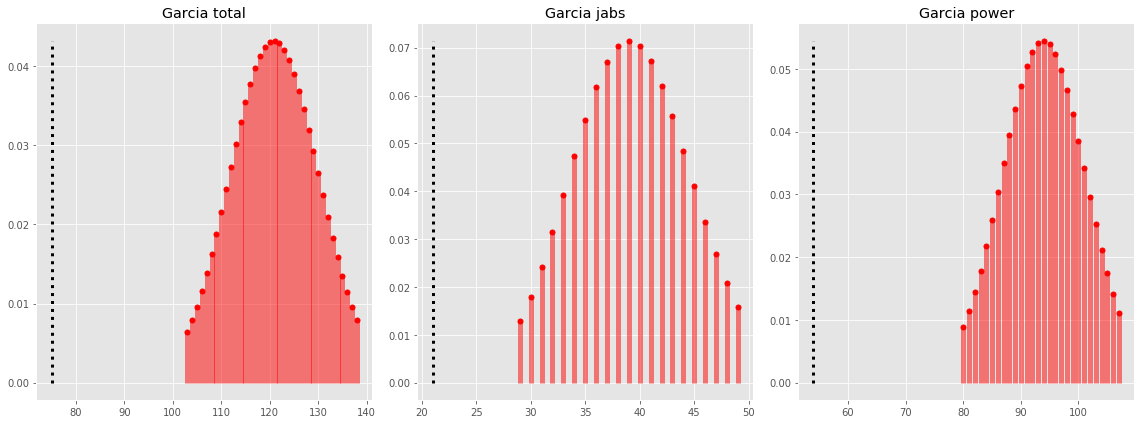

In [5]:
s_plot = 1

fig = plt.figure(figsize=(16,6))

for stat in ((406, .298, "Garcia total", 75), (188, .209, "Garcia jabs", 21), (218, .431, "Garcia power", 54)):
    n, p, category, N = stat[0], stat[1], stat[2], stat[3]
    x = np.arange(binom.ppf(0.025, n, p),
                  binom.ppf(0.975, n, p))
    
    sim_bouts = 10000
    
    print("95 percent range for %s: \t" % category, int(np.min(x)), " - ", int(np.max(x)))
    print("\t %s actually landed: \t" % category, N)
    print("\t prob of landing this %s count or less:" % category, 
          "{0:.0f}%".format(np.sum(np.random.binomial(n, p, sim_bouts) < N)/float(sim_bouts) * 100))
    
    ax = fig.add_subplot(1,3,s_plot)
    ax.plot(x, binom.pmf(x, n, p), 'ro', ms=5, label='binom pmf')
    plt.title(category)
    ax.vlines(x, 0, binom.pmf(x, n, p), colors='r', lw=5, alpha=0.5)
    ax.vlines(N, 0, np.max(binom.pmf(x, n, p)), lw=3, linestyles=":")
    s_plot += 1
    
plt.tight_layout()
plt.show()

## Both fighters had their rates affected but while Mikey fell off the chart, almost literally and in a bad sense, Spence's superiour activity with the jab allowed him to set up and deliver the power punches, especially in volume over the second half of the bout

95 percent range for Spence total: 	 341  -  401
	 Spence total actually landed: 	 345
	 prob of landing this Spence total count or less: 4%
95 percent range for Spence jabs: 	 103  -  141
	 Spence jabs actually landed: 	 108
	 prob of landing this Spence jabs count or less: 7%
95 percent range for Spence power: 	 202  -  243
	 Spence power actually landed: 	 237
	 prob of landing this Spence power count or less: 90%


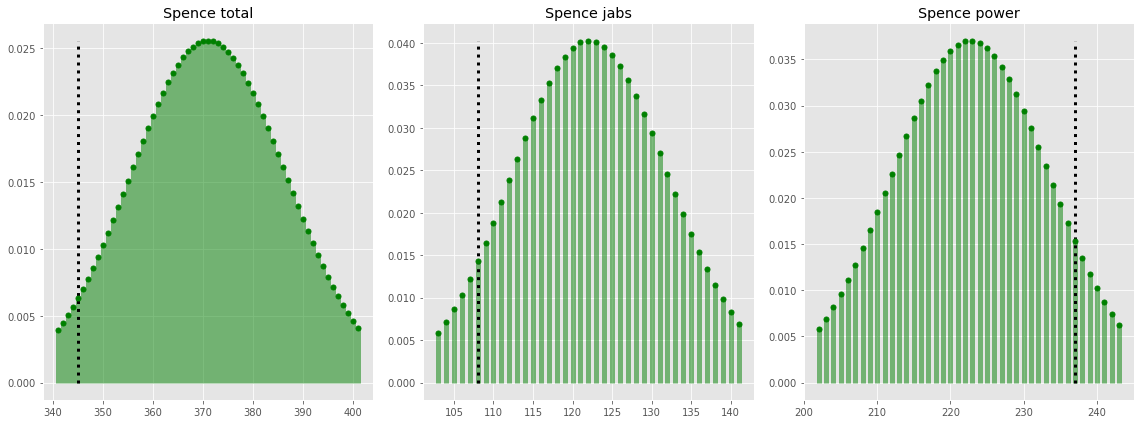

In [6]:
s_plot = 1

fig = plt.figure(figsize=(16,6))

for stat in ((1082, .343, "Spence total", 345), (618, .198, "Spence jabs", 108), (464, .480, "Spence power", 237)):
    n, p, category, N = stat[0], stat[1], stat[2], stat[3]
    x = np.arange(binom.ppf(0.025, n, p),
                  binom.ppf(0.975, n, p))
    
    sim_bouts = 10000
    
    print("95 percent range for %s: \t" % category, int(np.min(x)), " - ", int(np.max(x)))
    print("\t %s actually landed: \t" % category, N)
    print("\t prob of landing this %s count or less:" % category, 
          "{0:.0f}%".format(np.sum(np.random.binomial(n, p, sim_bouts) < N)/float(sim_bouts) * 100))
    
    ax = fig.add_subplot(1,3,s_plot)
    ax.plot(x, binom.pmf(x, n, p), 'go', ms=5, label='binom pmf')
    plt.title(category)
    ax.vlines(x, 0, binom.pmf(x, n, p), colors='g', lw=5, alpha=0.5)
    ax.vlines(N, 0, np.max(binom.pmf(x, n, p)), lw=3, linestyles=":")
    s_plot += 1
    
plt.tight_layout()
plt.show()

## One more look at thrown punches

In [7]:
def standardized_fight_night(sim_rds, poi_lambda, n_times, act):
    act_rds = len(act)
    fight_night_zscore = np.zeros(act_rds)
    
    for i in range(n_times):
        fight_night_zscore += zscore(np.append(np.random.poisson(poi_lambda, sim_rds), act))[-act_rds:]
        
    return fight_night_zscore/n_times

spence_total_zscore = standardized_fight_night(60, 64, 100, spence_total_thrown)
spence_total_zscore

array([-1.42441765, -0.84977684,  0.42720275,  1.32108846,  1.12954152,
        1.70418233,  0.10795785,  2.15112519,  3.36425579,  3.61965171,
        3.17270886,  2.02342723])

In [8]:
garcia_total_zscore = standardized_fight_night(60, 53, 100, garcia_total_thrown)
garcia_total_zscore

array([-3.40959768, -1.96473539, -1.69382371, -1.33260814, -0.79078479,
       -0.610177  , -2.14534318, -0.79078479, -1.60351982,  1.10559696,
       -3.138686  , -0.88108868])

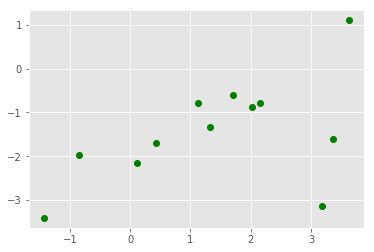

In [9]:
plt.plot(spence_total_zscore, garcia_total_zscore, 'go')